In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

| Columna     | Descripción |
|-------------|-------------|
| Fecha       | Fecha de la observación |
| Ubicacion   | Ubicación de la estación meteorológica |
| MinTemp     | Temperatura mínima en grados Celsius |
| MaxTemp     | Temperatura máxima en grados Celsius |
| Lluvia      | Cantidad de lluvia registrada ese día en mm |
| Evaporacion | Evaporación (mm) en 24 horas |
| Sol         | Número de horas de sol brillante en el día |
| DirRafaga   | Dirección de la ráfaga de viento más fuerte en 24 horas |
| VelRafaga   | Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas |
| Dir9am      | Dirección del viento a las 9am |
| Dir3pm      | Dirección del viento a las 3pm |
| Vel9am      | Velocidad (km/hr) del viento a las 9am |
| Vel3pm      | Velocidad (km/hr) del viento a las 3pm |
| Hum9am      | Porcentaje de humedad a las 9am |
| Hum3pm      | Porcentaje de humedad a las 3pm |
| Pres9am     | Presión atmosférica (hpa) a nivel del mar a las 9am |
| Pre3pm      | Presión atmosférica (hpa) a nivel del mar a las 3pm |
| Nub9am      | Fracción del cielo cubierto por nubes a las 9am |
| Nub3pm      | Fracción del cielo cubierto por nubes a las 3pm |
| Temp9am     | Temperatura en grados Celsius a las 9am |
| Temp3pm     | Temperatura en grados Celsius a las 3pm |
| LluviaHoy   | Variable indicadora que toma el valor 1 si la precipitación es en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no |
| RISK_MM     | La cantidad de lluvia. Una especie de medida del "riesgo" |
| LluviaMan   | Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no |

### Fase 1
Comprension del Negocio

In [47]:
##Rellenar fase 1 con markdown

## Fase 2
Comprension de los Datos

In [48]:
df = pd.read_csv('../datasets/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [49]:
df1 = df.copy()

In [50]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [51]:
for feature in df1.columns:
  print('Total de valores nulos de', feature, '=', df1[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

In [52]:
df1.isna().sum().sum()

316559

In [53]:
# Agrupacion de las columnas por tipo de datos
tipos = df1.columns.to_series().groupby(df1.dtypes).groups

# Conociendo la lista de columnas categoricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categoricos

7

In [54]:
# Conociendo la lista de columnas numericas
columnas = df1.columns
cnum = list(set(columnas) - set(ctext))
len(cnum)

17

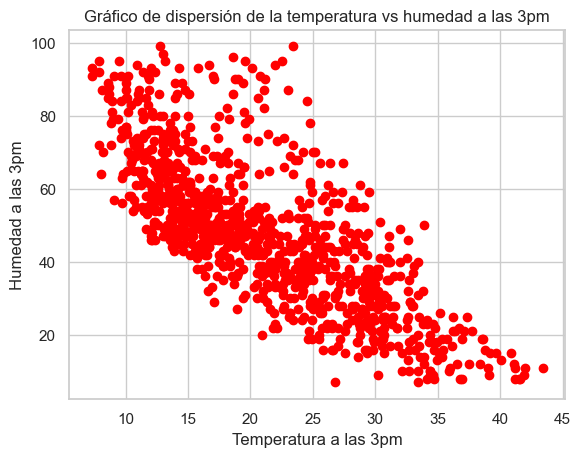

In [55]:
plt.scatter(df1.loc[:1000, 'Temp3pm'], df1.loc[:1000, 'Humidity3pm'], c='red')
plt.xlabel('Temperatura a las 3pm')
plt.ylabel('Humedad a las 3pm')
plt.title('Gráfico de dispersión de la temperatura vs humedad a las 3pm')
plt.show()

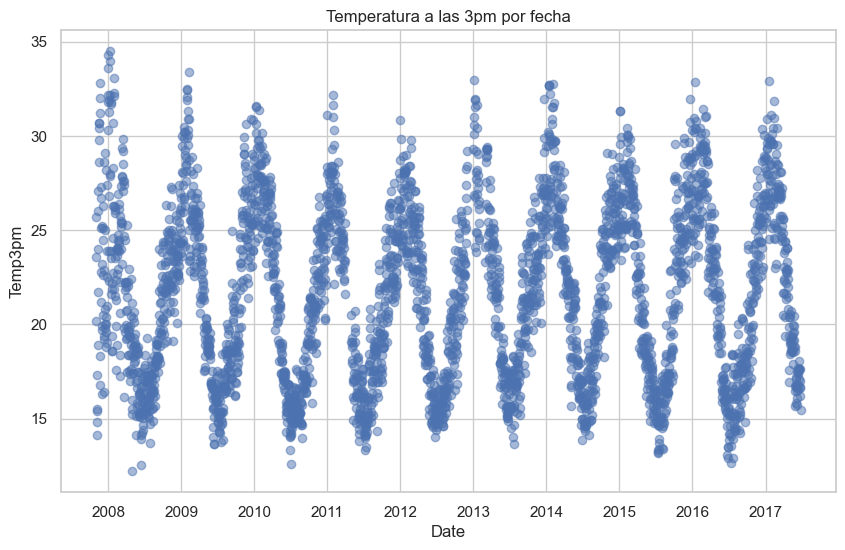

In [56]:
df1["Date"] = pd.to_datetime(df1["Date"])

df1_new = df1[["Date", "Temp3pm"]]

df1_subsampled = df1_new.resample("D", on="Date").mean()

plt.figure(figsize=(10,6))
plt.scatter(df1_subsampled.index, df1_subsampled["Temp3pm"], alpha=0.5)
plt.title("Temperatura a las 3pm por fecha")
plt.xlabel("Date")
plt.ylabel("Temp3pm")
plt.grid(True)
plt.show()

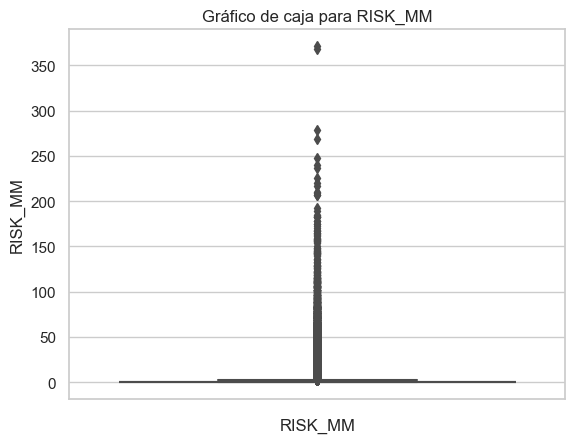

In [57]:
sns.set(style="whitegrid")

box_plot = sns.boxplot(y=df1['RISK_MM'])

box_plot.set_title('Gráfico de caja para RISK_MM')
box_plot.set_xlabel('RISK_MM')

plt.show()

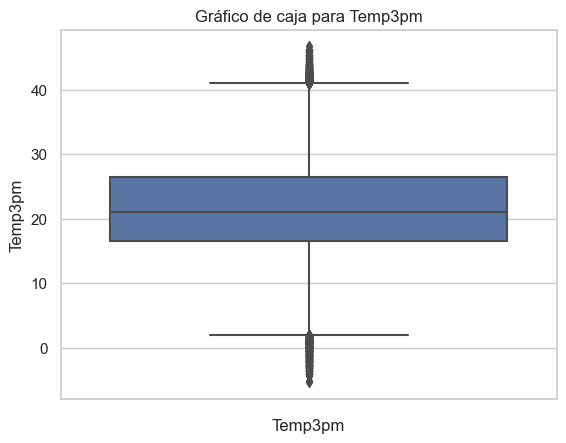

In [58]:
# Grafico de caja de Temp3pm
sns.set(style="whitegrid")
box_plot = sns.boxplot(y=df1.loc[:,'Temp3pm'])

box_plot.set_title('Gráfico de caja para Temp3pm')
box_plot.set_xlabel('Temp3pm')

plt.show()

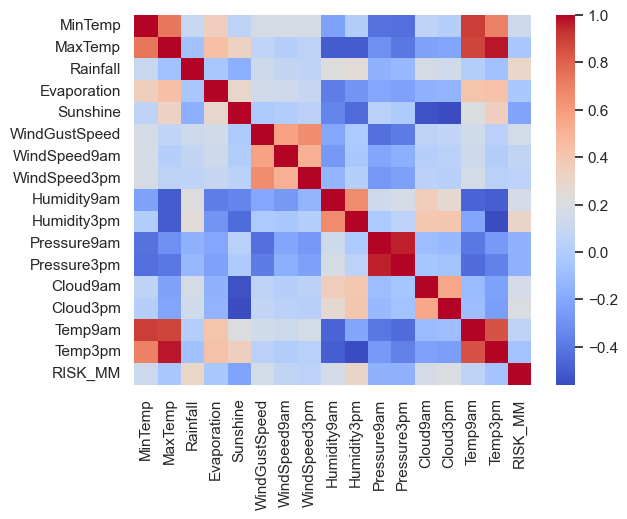

In [ ]:
# HeatMap (Mapa de calor)
corr_matrix = df1.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

### Fase 3
Preparacion de los datos

In [59]:
# Crear el imputador para transformar los datos nulos
imputerMean = SimpleImputer(strategy="mean")
imputerMode = SimpleImputer(strategy="most_frequent")

# Iterar sobre las columnas del DataFrame
for col in df1.columns:
    # Si el tipo de datos de la columna es float64
    if df1[col].dtype == np.float64:
        # Realizar la imputación
        df1[col] = imputerMean.fit_transform(df1[[col]]).ravel()
    
    elif df1[col].dtype == np.object_:
        # Realizar la imputación
        df1[col] = imputerMode.fit_transform(df1[[col]]).ravel()

# Verificar si quedan valores NA
print(df1.isna().sum().sum())

0
